## Housing Company Price Prediction Assignment
### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # if there are any warning due to version mismatch, it will be ignored

pd.set_option('display.max_rows', 700, 'display.max_columns', 40)
pd.options.display.float_format = '{:,.2f}'.format

## Step 1: Reading and Understanding the Data

In [2]:
#Let us first import and read the dataset
housing_info_df = pd.read_csv('train.csv',encoding = "ISO-8859-1", low_memory=False)
housing_info_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check the tail
housing_info_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,...,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,...,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,...,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,...,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.00,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,...,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# checking shape of the dataframe
housing_info_df.shape

(1460, 81)

In [5]:
# check dataset Information
housing_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- We can observe there are missing values

In [6]:
# lets check statstical information using describe
housing_info_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


- We can observe that there is clear outlier in variables(EnclosedPorch, BsmtFinSF2, OverallCond, ScreenPorch etc.) 
- Let"s visualise these further and treat accordingly.

## Step 2: Visualising the Data

In [7]:
#Find number of unique values in each column
temp_unique = housing_info_df.nunique().sort_values()
print(temp_unique)

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

- In unique values response, we can observe 'Id' has all unique values for each entry.
- we can drop id as this only a primary key

In [8]:
#we will drop above Id varrable 
housing_info_df = housing_info_df.drop(['Id'],axis=1)
housing_info_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Check for Null Values

In [9]:
# Separating the Numerical and Categorical features for analysis
housing_categorical_df = housing_info_df.select_dtypes(include=['object'])
housing_numeric_df = housing_info_df.select_dtypes(include=['int64', 'float64'])

In [10]:
# Lets check numerical features in the dataframe
housing_numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#Checking the missing values pecentage in housing_numeric_df 
missing_sum = housing_numeric_df.isnull().sum().sort_values(ascending=False)
missing_percent = (housing_numeric_df.isnull().sum()/housing_numeric_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_percent*100], axis=1, keys=['Sum', 'Percent'])
missing_data.head(10)

,Sum,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
OpenPorchSF,0,0.00
KitchenAbvGr,0,0.00
TotRmsAbvGrd,0,0.00
Fireplaces,0,0.00
GarageCars,0,0.00
GarageArea,0,0.00
WoodDeckSF,0,0.00


 - we can observe missing values in LotFrontage, GarageYrBlt and MasVnrArea
 - Let's check their predictive power first and  then  decide about imputing  values

In [12]:
#Checking the missing values pecentage in housing_categorical_df
missing_sum = housing_categorical_df.isnull().sum().sort_values(ascending=False)
missing_percent = (housing_categorical_df.isnull().sum()/housing_categorical_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_percent*100], axis=1, keys=['Sum', 'Percent'])
missing_data.head(20)

,Sum,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageType,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
BsmtFinType2,38,2.60


In [13]:
# dropping 'PoolQC' for very high percentage of missing value
housing_info_df.drop(['PoolQC'], axis=1, inplace=True)

#for least missing values count, dropping rows with null values in 'Electrical'
housing_info_df.dropna(subset=['Electrical'], inplace=True)

- Instead of dropping the null values which will result in a data loss, Let's impute the null values according to the domain understanding and the data dictionary provided with the data.

In [14]:
# According to the data dictionary provided, the NA in these columns indicates the absence of facility which may affect the price
# Create a categorical_features list based on above missing  values response
categorical_features = ['Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2','BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MiscFeature']

# Imputing missing values with "None"
housing_info_df[categorical_features] = housing_info_df[categorical_features].fillna(value='None', axis=1)

# Checking after imputation
print(housing_info_df[categorical_features].isnull().sum())
     

Alley           0
Fence           0
FireplaceQu     0
GarageType      0
GarageCond      0
GarageQual      0
GarageFinish    0
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
BsmtCond        0
MiscFeature     0
dtype: int64


- we can observe that there is no null value anymore in the data after imputing

#### Outlier detection and treatment

In [15]:
#Checking for percentage of outliers for all the numerical variables.
outliers_percentage={}

for feature in housing_numeric_df.columns:
    IQR=housing_numeric_df[feature].quantile(.75)-housing_numeric_df[feature].quantile(.25)
    outliers_count=housing_numeric_df[(housing_numeric_df[feature]>(housing_numeric_df[feature].quantile(.75)+1.5*IQR)) | (housing_numeric_df[feature]<(housing_numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/housing_numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
31,ScreenPorch,7.95
0,MSSubClass,7.05
7,MasVnrArea,6.58
1,LotFrontage,6.03
17,BsmtHalfBath,5.62
28,OpenPorchSF,5.27
2,LotArea,4.73


**Observations:**
- Majority of the numeric features have outliers
- Dropping all the outliers will cause loss of data and could be important information.
- Let's fix these feature where feature value is outside the range using Inter Quartile Range(IQR)
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.


In [16]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_info_df[feature].quantile(.75) - housing_info_df[feature].quantile(.25) 
        max_value = housing_info_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_info_df[feature].quantile(.25)-1.5*IQR
        housing_info_df[feature][housing_info_df[feature] > max_value] = max_value
        housing_info_df[feature][housing_info_df[feature] < min_value ] = min_value

In [17]:
# Checking the dataset again after fixing features with outlier values
housing_info_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,459.00","1,200.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,451.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,378.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00","1,459.00"
mean,55.07,69.13,"9,647.80",6.10,5.54,"1,971.28","1,984.85",90.25,440.30,0.00,563.90,"1,050.72","1,157.30",346.59,0.00,"1,503.87",0.43,0.00,1.56,0.38,2.85,1.00,6.49,0.61,"1,978.49",1.77,470.75,91.80,42.63,0.00,0.00,0.00,0.00,0.00,6.32,"2,007.82","180,930.39"
std,37.52,19.67,"3,596.69",1.38,0.96,30.10,20.64,134.95,433.22,0.00,431.83,397.69,362.58,435.87,0.00,481.68,0.52,0.00,0.55,0.50,0.76,0.00,1.54,0.64,24.69,0.74,207.24,116.70,52.51,0.00,0.00,0.00,0.00,0.00,2.70,1.33,"79,468.96"
min,20.00,27.50,"1,468.00",2.00,3.50,"1,885.00","1,950.00",0.00,0.00,0.00,0.00,42.25,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.50,1.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,20.00,59.00,"7,549.00",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,796.00,882.00,0.00,0.00,"1,129.00",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,333.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,950.00"
50%,50.00,69.00,"9,477.00",6.00,5.00,"1,973.00","1,994.00",0.00,384.00,0.00,479.00,992.00,"1,088.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,70.00,80.00,"11,603.00",7.00,6.00,"2,000.00","2,004.00",166.00,712.50,0.00,808.00,"1,298.50","1,391.50",728.00,0.00,"1,777.50",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
90%,120.00,96.00,"14,388.40",8.00,7.00,"2,006.00","2,006.00",335.00,"1,066.00",0.00,"1,232.00","1,602.40","1,680.00",954.40,0.00,"2,158.60",1.00,0.00,2.00,1.00,4.00,1.00,9.00,1.00,"2,006.00",3.00,757.20,262.00,130.00,0.00,0.00,0.00,0.00,0.00,10.00,"2,010.00","278,000.00"
95%,145.00,107.00,"17,402.30",8.00,7.50,"2,007.00","2,007.00",415.00,"1,274.00",0.00,"1,468.00","1,753.00","1,831.50","1,141.10",0.00,"2,466.20",1.00,0.00,2.00,1.00,4.00,1.00,10.00,2.00,"2,007.00",3.00,850.20,335.00,170.00,0.00,0.00,0.00,0.00,0.00,11.00,"2,010.00","326,200.00"
99%,145.00,111.50,"17,684.00",10.00,7.50,"2,009.00","2,009.00",415.00,"1,572.42",0.00,"1,685.50","2,052.25","2,155.75","1,419.04",0.00,"2,750.25",2.00,0.00,3.00,1.00,4.50,1.00,10.00,2.00,"2,009.00",3.00,940.50,420.00,170.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,010.00","442,629.62"


- We can observe mean and median looks closer now and data distribution is normal with each percentiles increases

In [18]:
# checking the shape again after outlier treatment
housing_info_df.shape

(1459, 79)

#### Check for Duplicates

In [19]:
# Check if there are any duplicate values in the dataset
housing_info_df[housing_info_df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


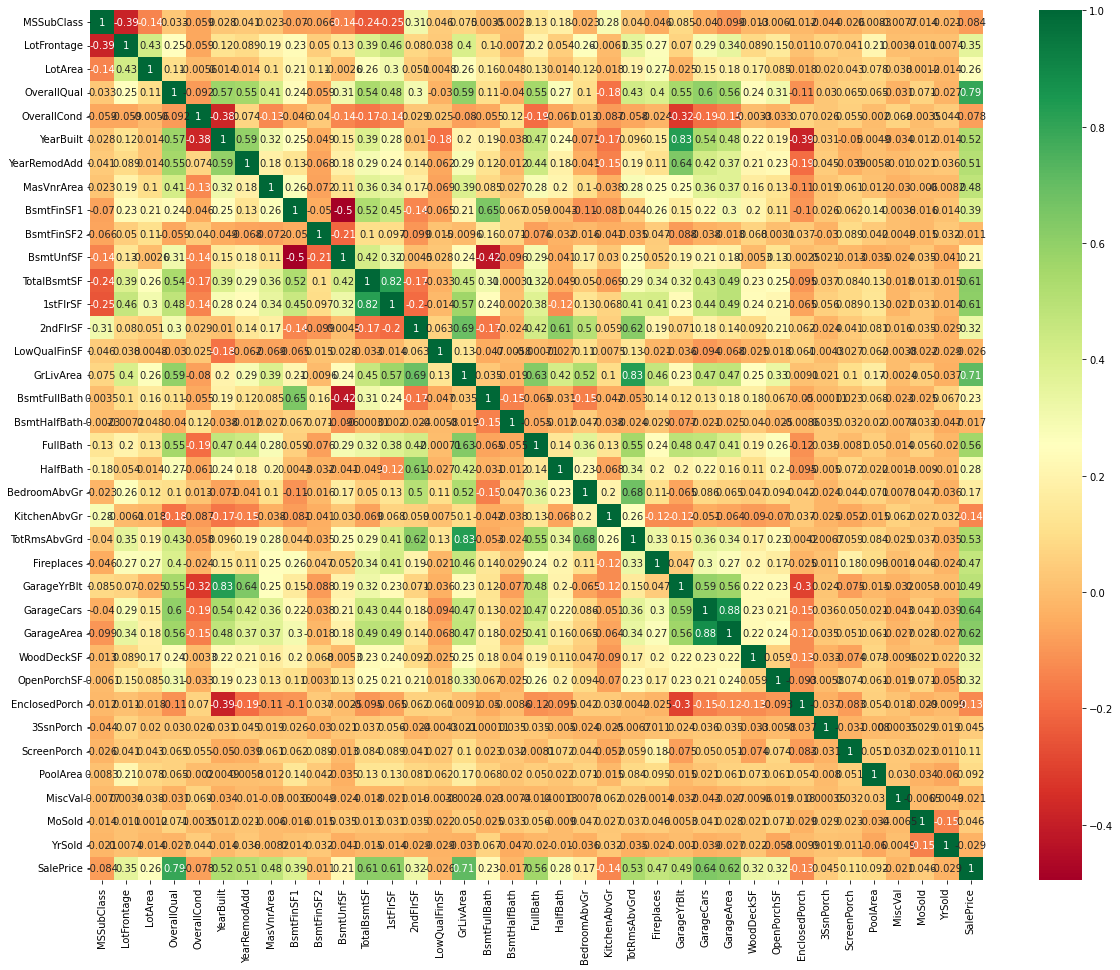

In [20]:
### Lets check correlation in numeric vaiables
plt.figure(figsize=(20,16))
sns.heatmap(housing_numeric_df.corr(),annot=True, cmap="RdYlGn")
plt.show()

- We can observe that below variables are highly related with the sales price
    - Overall Quality
    - Garage Area
    - GarageCars
    - Year removeadd
    - Year Built
    - 1st Foor SF
    - TotalBsmn SF
    - Gr Living Area
    - Fullbath
    - Fireplaces
    - MasVnrArea
    - LotFrontage
- We can clearly observe that some of the variables are correlated with each other
    - GarageCars and GarageArea (0.88)
    - TotRmsAbvGrd and GrLivArea (0.83)
    - GarageYrBlt and YearBuilt (0.83)
    - TotalBsmtSF and 1stflrSF (0.82)
- Before dropping one of these varabales, Let's first check their predictive power

In [21]:
#Checking the missing values pecentage in housing_numeric_df once again
missing_sum = housing_numeric_df.isnull().sum().sort_values(ascending=False)
missing_percent = (housing_numeric_df.isnull().sum()/housing_numeric_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_percent*100], axis=1, keys=['Sum', 'Percent'])
missing_data.head(10)

,Sum,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
OpenPorchSF,0,0.00
KitchenAbvGr,0,0.00
TotRmsAbvGrd,0,0.00
Fireplaces,0,0.00
GarageCars,0,0.00
GarageArea,0,0.00
WoodDeckSF,0,0.00


- Let's impute LotFrontage, GarageYrBlt and MasVnrArea.

In [22]:
# impute null values with 0 for GarageYrBlt 
housing_info_df['GarageYrBlt'] =housing_info_df['GarageYrBlt'].fillna(0)
housing_info_df['GarageYrBlt'] = housing_info_df['GarageYrBlt'].astype(int)

# Since MasVnrArea has less then 1% missing values, Let's drop rows with NULL values
housing_info_df.dropna(subset=['MasVnrArea'], inplace=True)
# Impute the null values with mean values for LotFrontage 
housing_info_df['LotFrontage'] = housing_info_df['LotFrontage'].replace(np.nan, housing_info_df['LotFrontage'].median())


####  Numerical Features

In [23]:
# lets statistics for each numerical variables
housing_info_df[housing_numeric_df.columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00"
mean,55.11,69.09,"9,643.77",6.10,5.55,"1,971.12","1,984.76",90.25,438.61,0.00,563.71,"1,049.12","1,156.16",346.54,0.00,"1,502.43",0.42,0.00,1.56,0.38,2.85,1.00,6.49,0.61,"1,867.91",1.76,470.23,91.96,42.41,0.00,0.00,0.00,0.00,0.00,6.32,"2,007.82","180,624.10"
std,37.53,17.82,"3,594.99",1.38,0.96,30.10,20.65,134.95,432.30,0.00,432.00,396.81,361.55,435.71,0.00,481.55,0.52,0.00,0.55,0.50,0.76,0.00,1.54,0.64,454.98,0.74,207.51,116.71,52.34,0.00,0.00,0.00,0.00,0.00,2.70,1.33,"79,312.13"
min,20.00,27.50,"1,468.00",2.00,3.50,"1,885.00","1,950.00",0.00,0.00,0.00,0.00,42.25,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.50,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,20.00,60.00,"7,537.50",5.00,5.00,"1,954.00","1,966.00",0.00,0.00,0.00,222.00,795.00,882.00,0.00,0.00,"1,128.00",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,958.00",1.00,327.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,900.00"
50%,50.00,69.00,"9,477.00",6.00,5.00,"1,972.00","1,993.00",0.00,381.00,0.00,479.00,991.00,"1,086.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,977.00",2.00,478.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","162,500.00"
75%,70.00,79.00,"11,600.00",7.00,6.00,"2,000.00","2,004.00",166.00,707.00,0.00,808.00,"1,297.50","1,391.00",728.00,0.00,"1,776.00",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,001.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,145.00,111.50,"17,684.00",10.00,7.50,"2,010.00","2,010.00",415.00,"1,781.25",0.00,"1,685.50","2,052.25","2,155.75","1,820.00",0.00,"2,750.25",2.50,0.00,3.00,2.00,4.50,1.00,10.00,2.50,"2,010.00",3.50,940.50,420.00,170.00,0.00,0.00,0.00,0.00,0.00,12.00,"2,010.00","755,000.00"


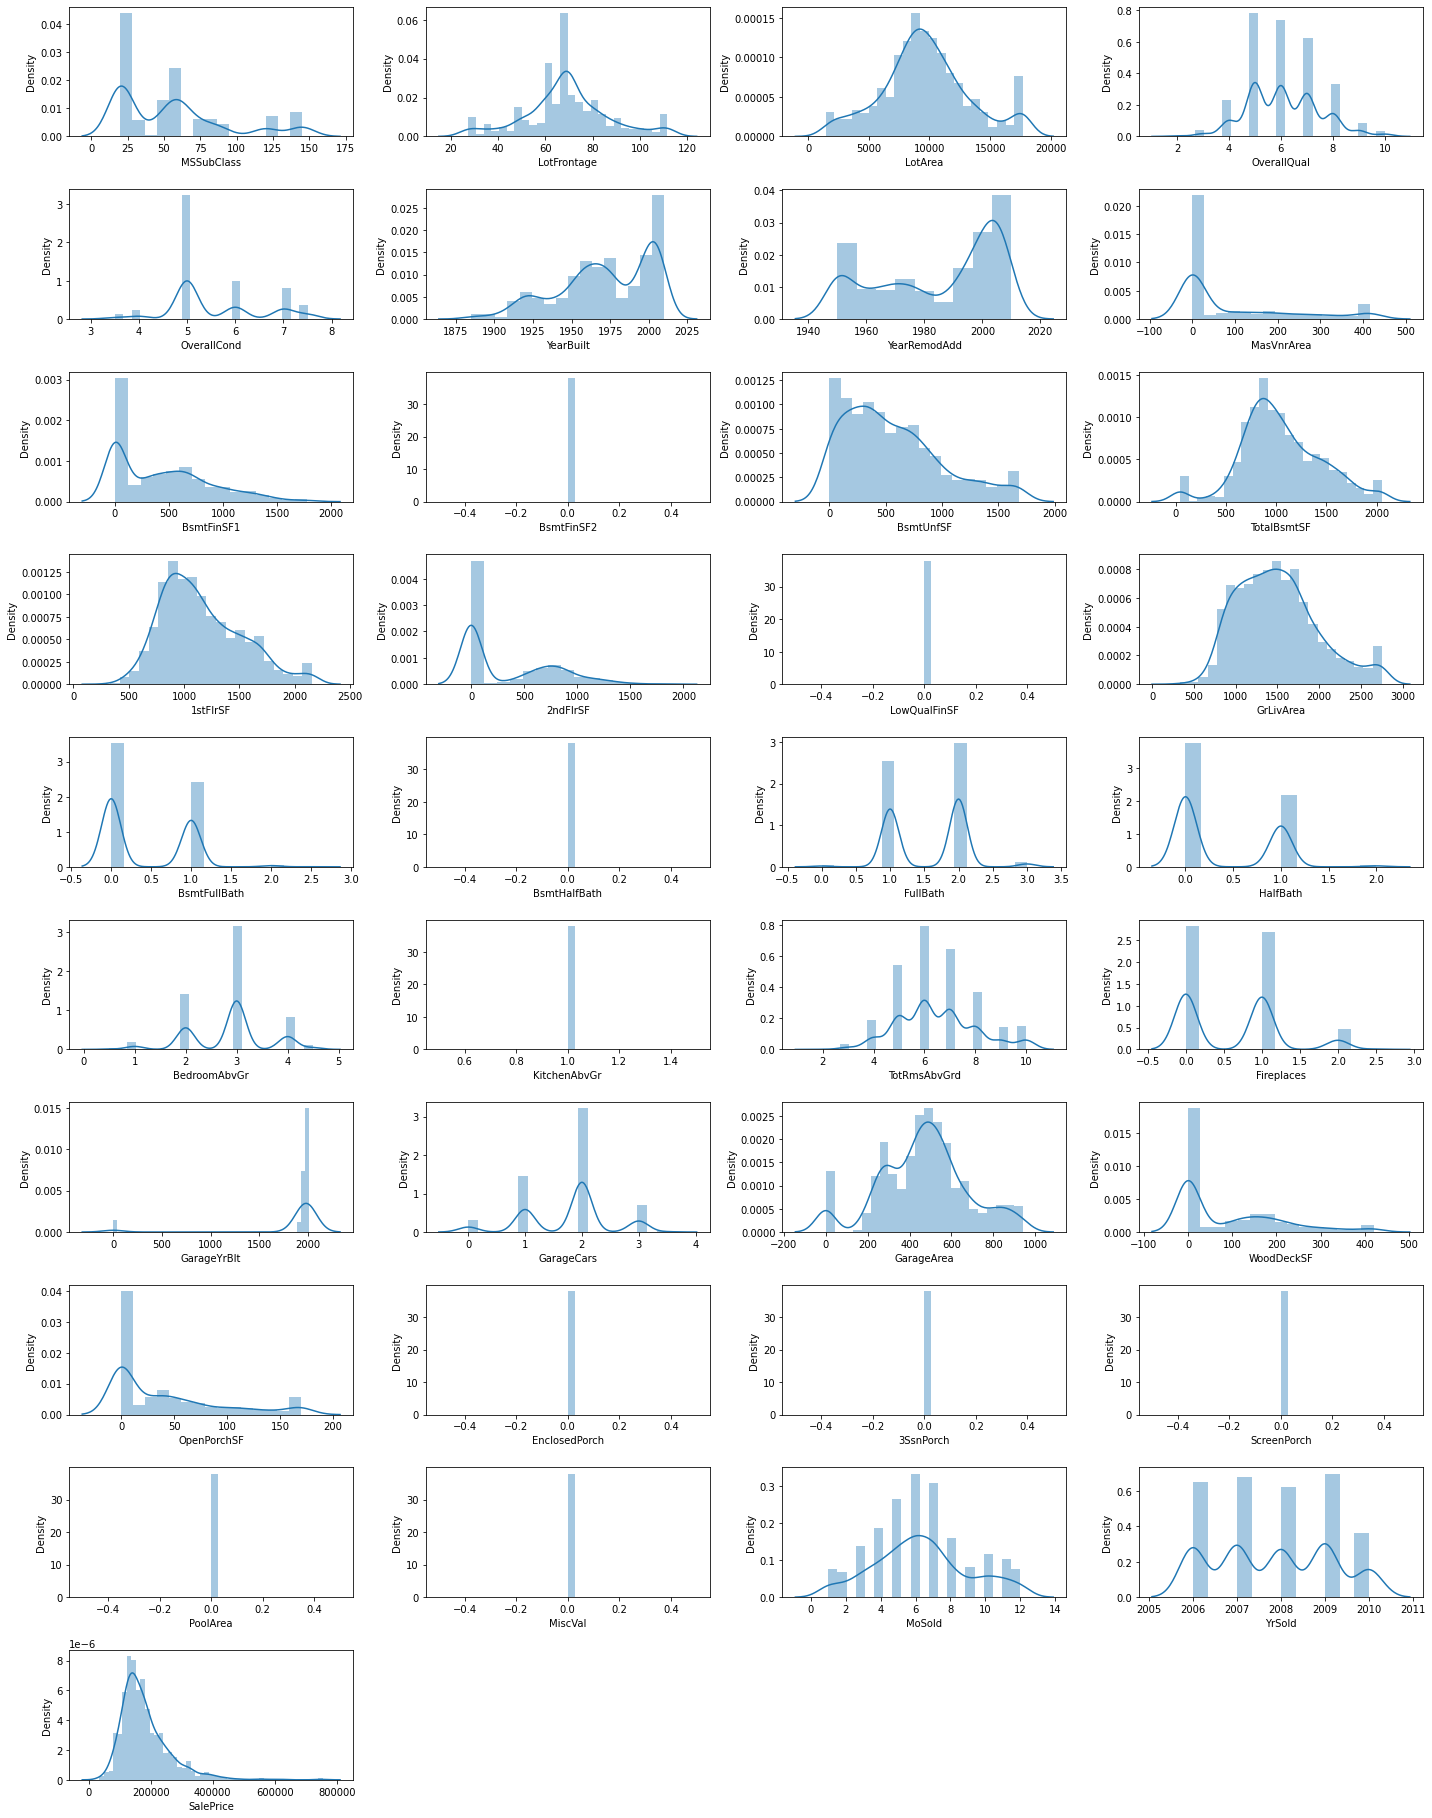

In [24]:
#Visualizing the distribution of each numerical variables
fig=plt.subplots(figsize=(20, 30))

for i, feature in enumerate(housing_numeric_df.columns):
    plt.subplot(12, 4, i+1)
    sns.distplot(housing_info_df[feature])
    plt.tight_layout()

 - There is no outlier and values normally distibuted in below listed variables:
     - 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
     - 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 
     - 'GarageArea', 'OpenPorchSF'
 - There are single values in below listed variables and can be dropped:
     - 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 
     - 'ScreenPorch', 'PoolArea', 'MiscVal'
 

In [25]:
# check Statistical information before dropping below features
housing_info_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()


,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,"1,451.00","1,451.00","1,451.00","1,451.00","1,451.00","1,451.00"
mean,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
# deleting single values variables as these would not contribute in predicting SalePrice
housing_info_df.drop(['LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)


Now, let's also drop multicolinear variables
- GarageCars and GarageArea (0.88)
    - dropping GarageCars as both has almost same correlation with SalePrice
- TotRmsAbvGrd and GrLivArea (0.83)
    - dropping TotRmsAbvGrd as GrLivArea has high correlation with SalePrice
- GarageYrBlt and YearBuilt (0.83)
    - dropping GarageYrBlt as YearBuilt has slightly high correlation with SalePrice
- TotalBsmtSF and 1stflrSF (0.82)
    - dropping TotalBsmtSF as both has almost same correlation with SalePrice

In [27]:
housing_info_df.drop(['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis=1, inplace=True)

In [28]:
print(housing_info_df['KitchenAbvGr'].value_counts())

1    1451
Name: KitchenAbvGr, dtype: int64


In [29]:
# dropping KitchenAbvGr for not having useful information
housing_info_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [30]:
# Create a list of column with normal distribution to check scatter plot with SalePrice
nd_housing_numeric_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF','1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageArea', 'OpenPorchSF']


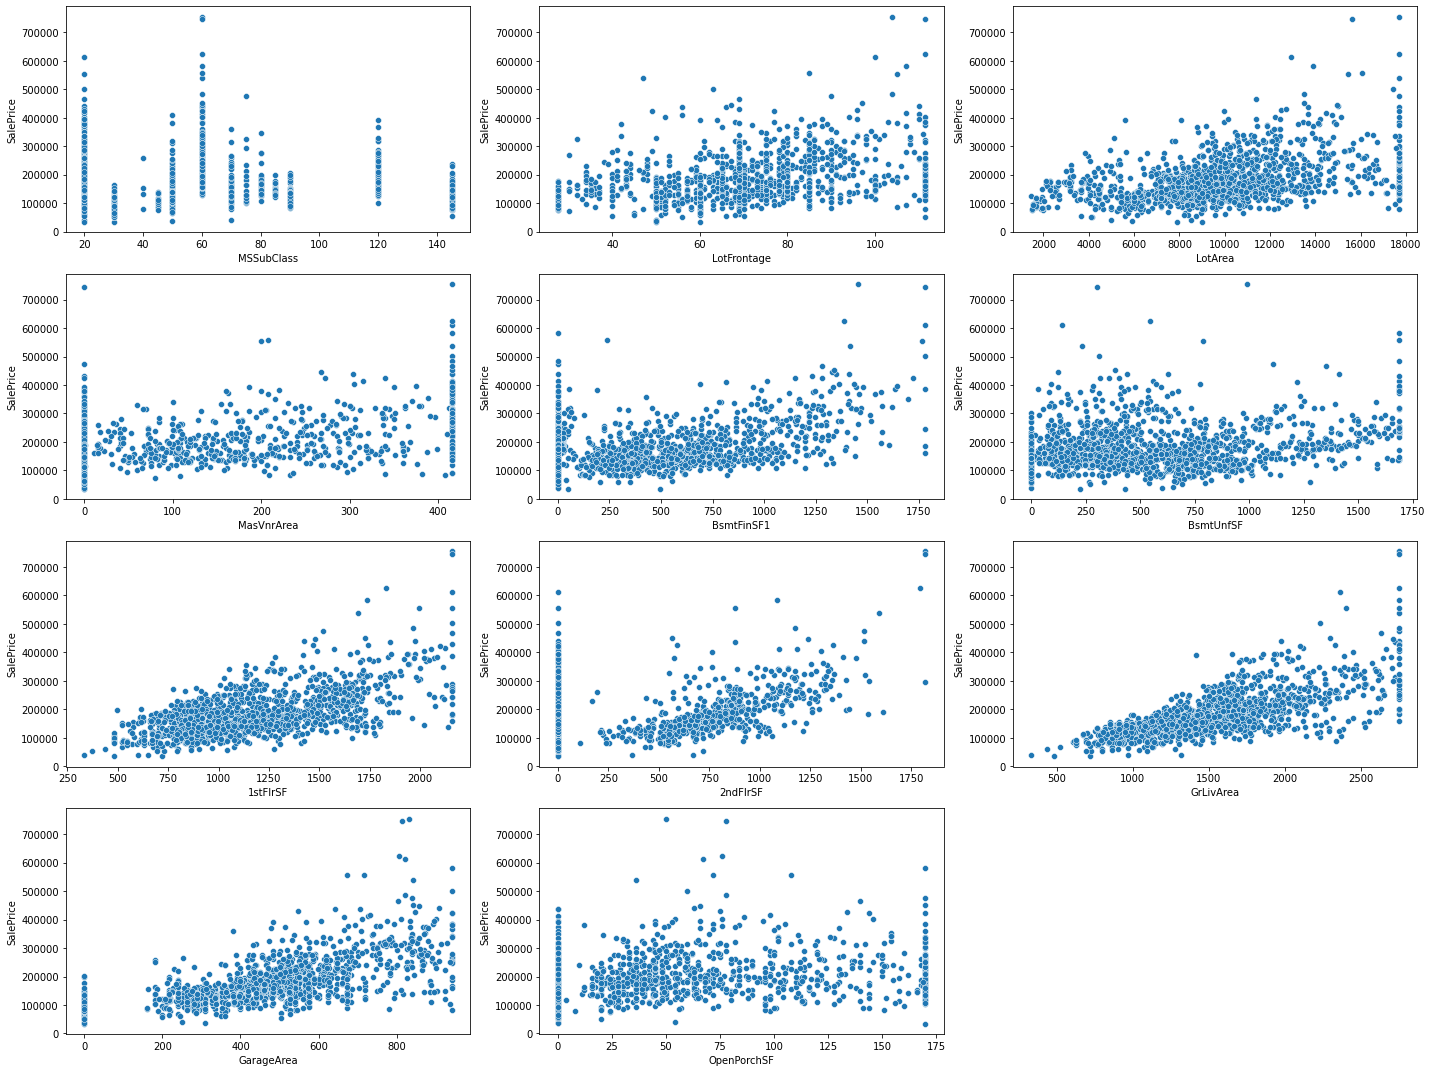

In [31]:
fig=plt.subplots(figsize=(20, 15))

for i, feature in enumerate(nd_housing_numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(housing_info_df[feature], housing_info_df['SalePrice'])
    plt.tight_layout()

**OBSERVATION** 
- Variables like 'GrLivArea', 'GarageArea', 'LotFrontage', 'LotArea', '1stFlrSF' and'2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values

In [32]:
# Lets check all the year remaining features
housing_info_df[['YearBuilt','YearRemodAdd', 'YrSold']].describe()


,YearBuilt,YearRemodAdd,YrSold
count,"1,451.00","1,451.00","1,451.00"
mean,"1,971.12","1,984.76","2,007.82"
std,30.10,20.65,1.33
min,"1,885.00","1,950.00","2,006.00"
25%,"1,954.00","1,966.00","2,007.00"
50%,"1,972.00","1,993.00","2,008.00"
75%,"2,000.00","2,004.00","2,009.00"
max,"2,010.00","2,010.00","2,010.00"


In [33]:
# lets convert the all the remaining year features to number of years
for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing_info_df[feature] = 2022 - housing_info_df[feature]

In [34]:
housing_info_df[['YearBuilt','YearRemodAdd', 'YrSold']].head()


,YearBuilt,YearRemodAdd,YrSold
0,19,19,14
1,46,46,15
2,21,20,14
3,107,52,16
4,22,22,14


####  Categorical Features

**Ordered Features** 

In [35]:
ordered_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual',
                    'Functional','FireplaceQu', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'BsmtQual', 
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']


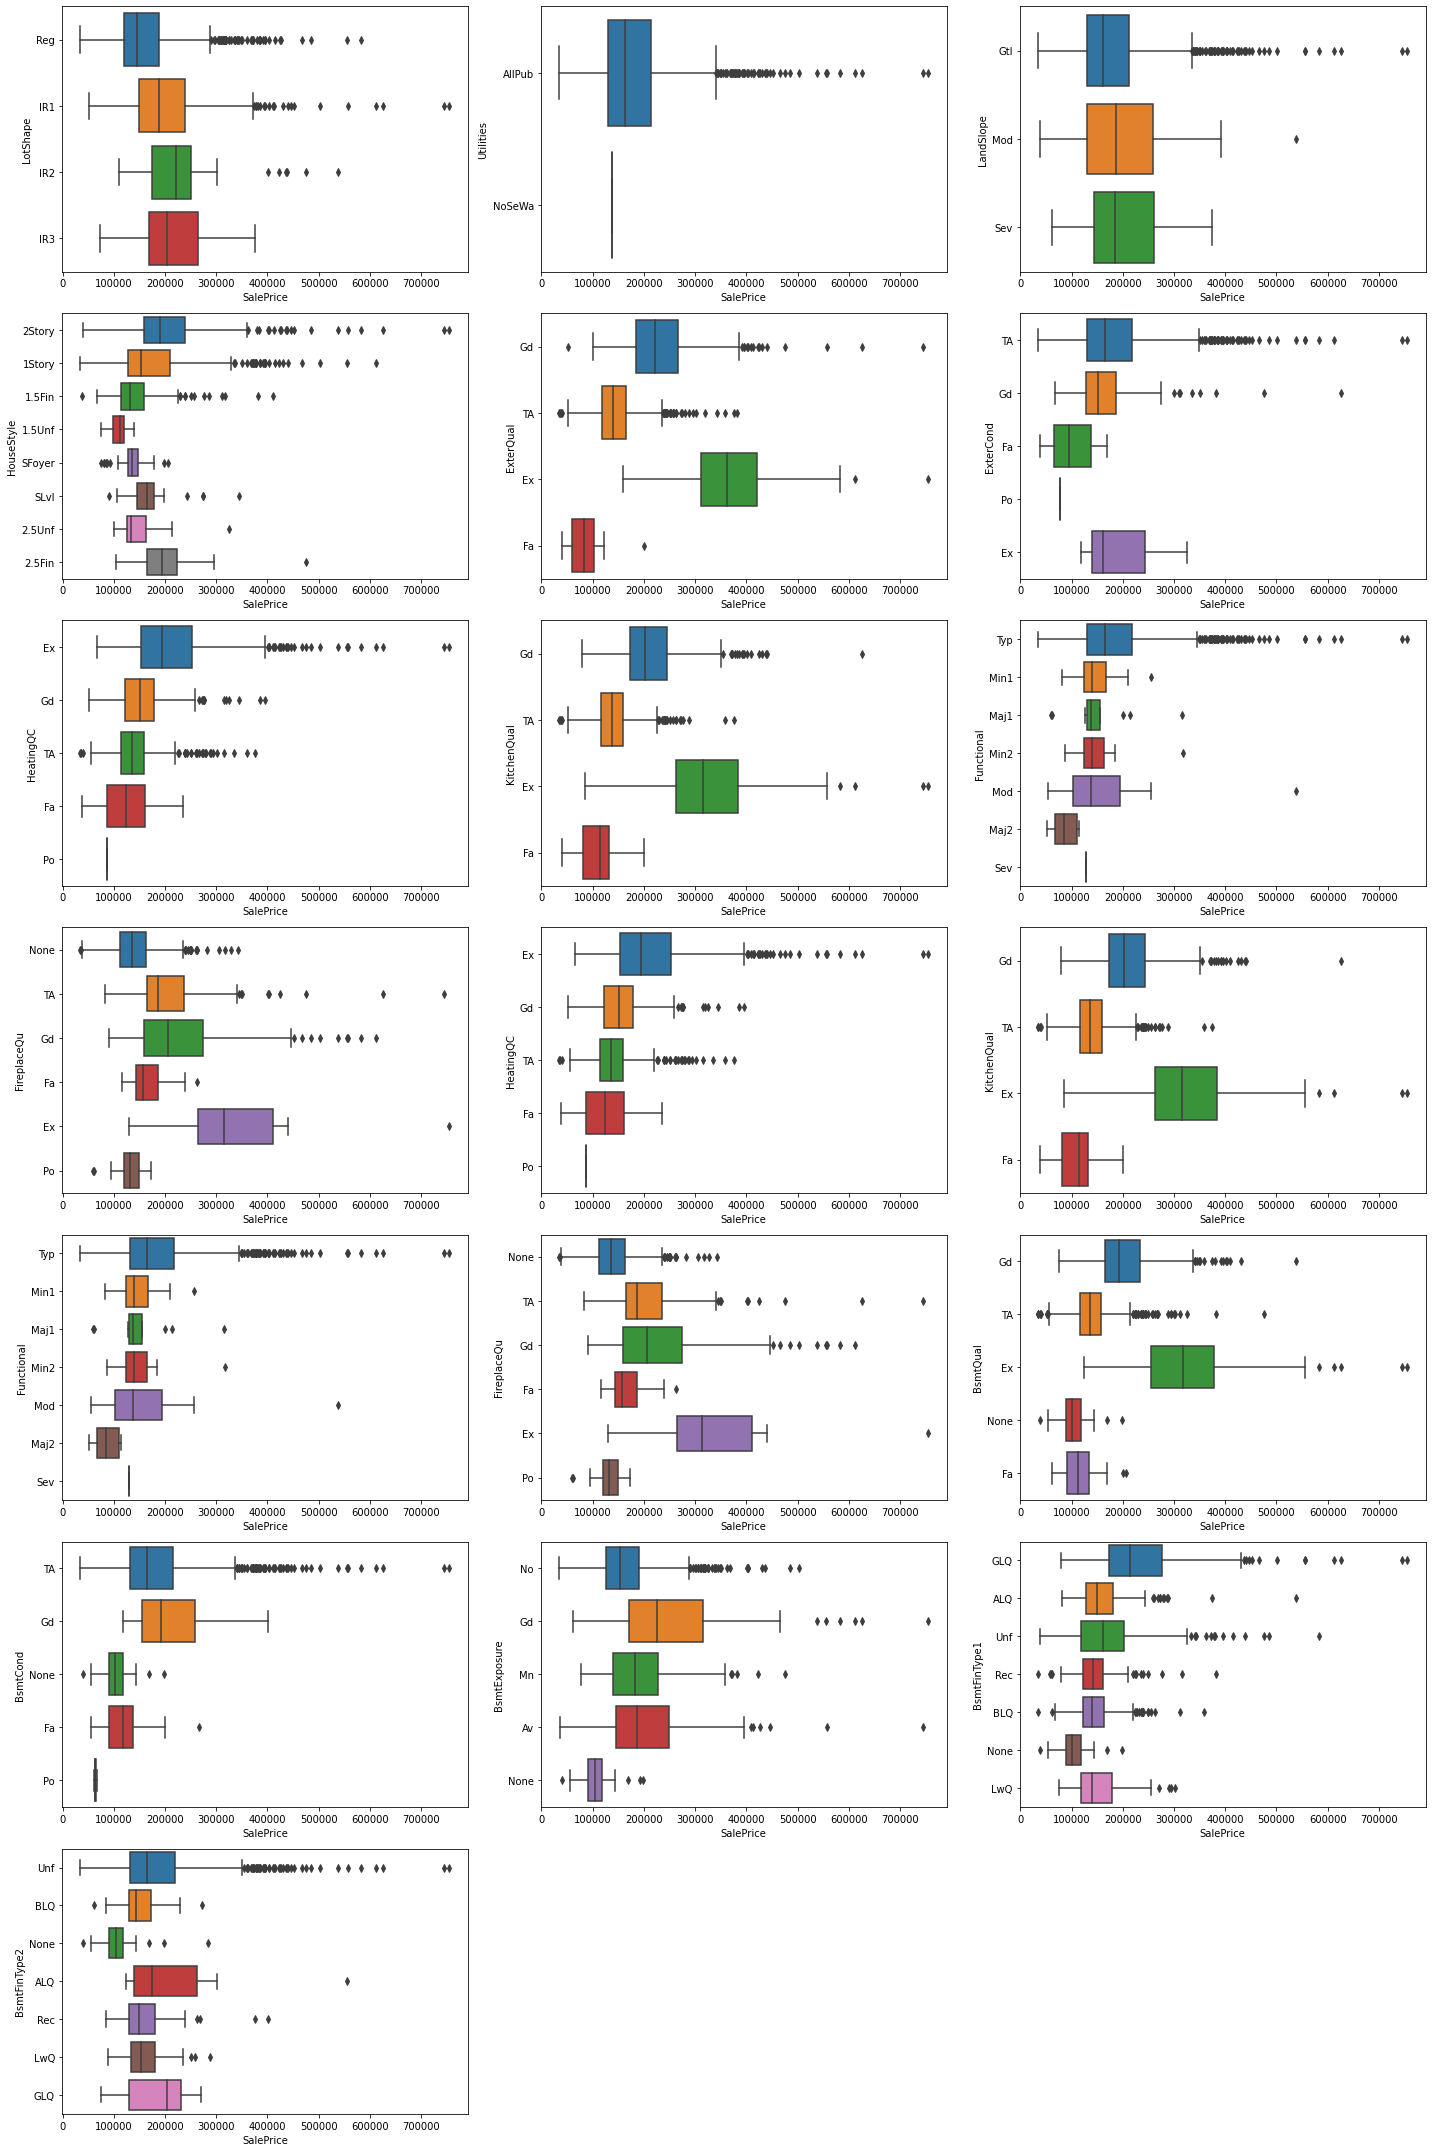

In [36]:
fig=plt.subplots(figsize=(20, 30))
for i, feature in enumerate(ordered_features):
    plt.subplot(7, 3, i+1)
    sns.boxplot(housing_info_df['SalePrice'], housing_info_df[feature])
    plt.tight_layout()

**Observations:**

- We can observe that the few reasnos for highest SalePrice are :
    - Even irregular LotShape 
    - The storied houses 
    - Houses with Excellent quality of material on the exterior 
    - Houses with Excellent exterior material condition 
    - Houses having excellent heating quality as well as kitchen quality 
    - Houses with typical functionality have highest SalePrice 
    - Houses with finished garage 
    - Houses with excellent quality basement
    - Housing with good living quarters (BsmtFinType1= GLQ)
    
- There are very few houses that are severely damaged.
- Most of the houses have all the public utilities
- Houses at severe land slope have lowest SalePrice 
   
- SalePrice range is wide for:
    - Houses with average fireplace quality.
    - Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.
- A lot of houses have unfinished basment or no basement (label = None)

**Unordered Features** 

In [37]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 
                      'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
                      'PavedDrive', 'Fence', 'SaleType','SaleCondition']

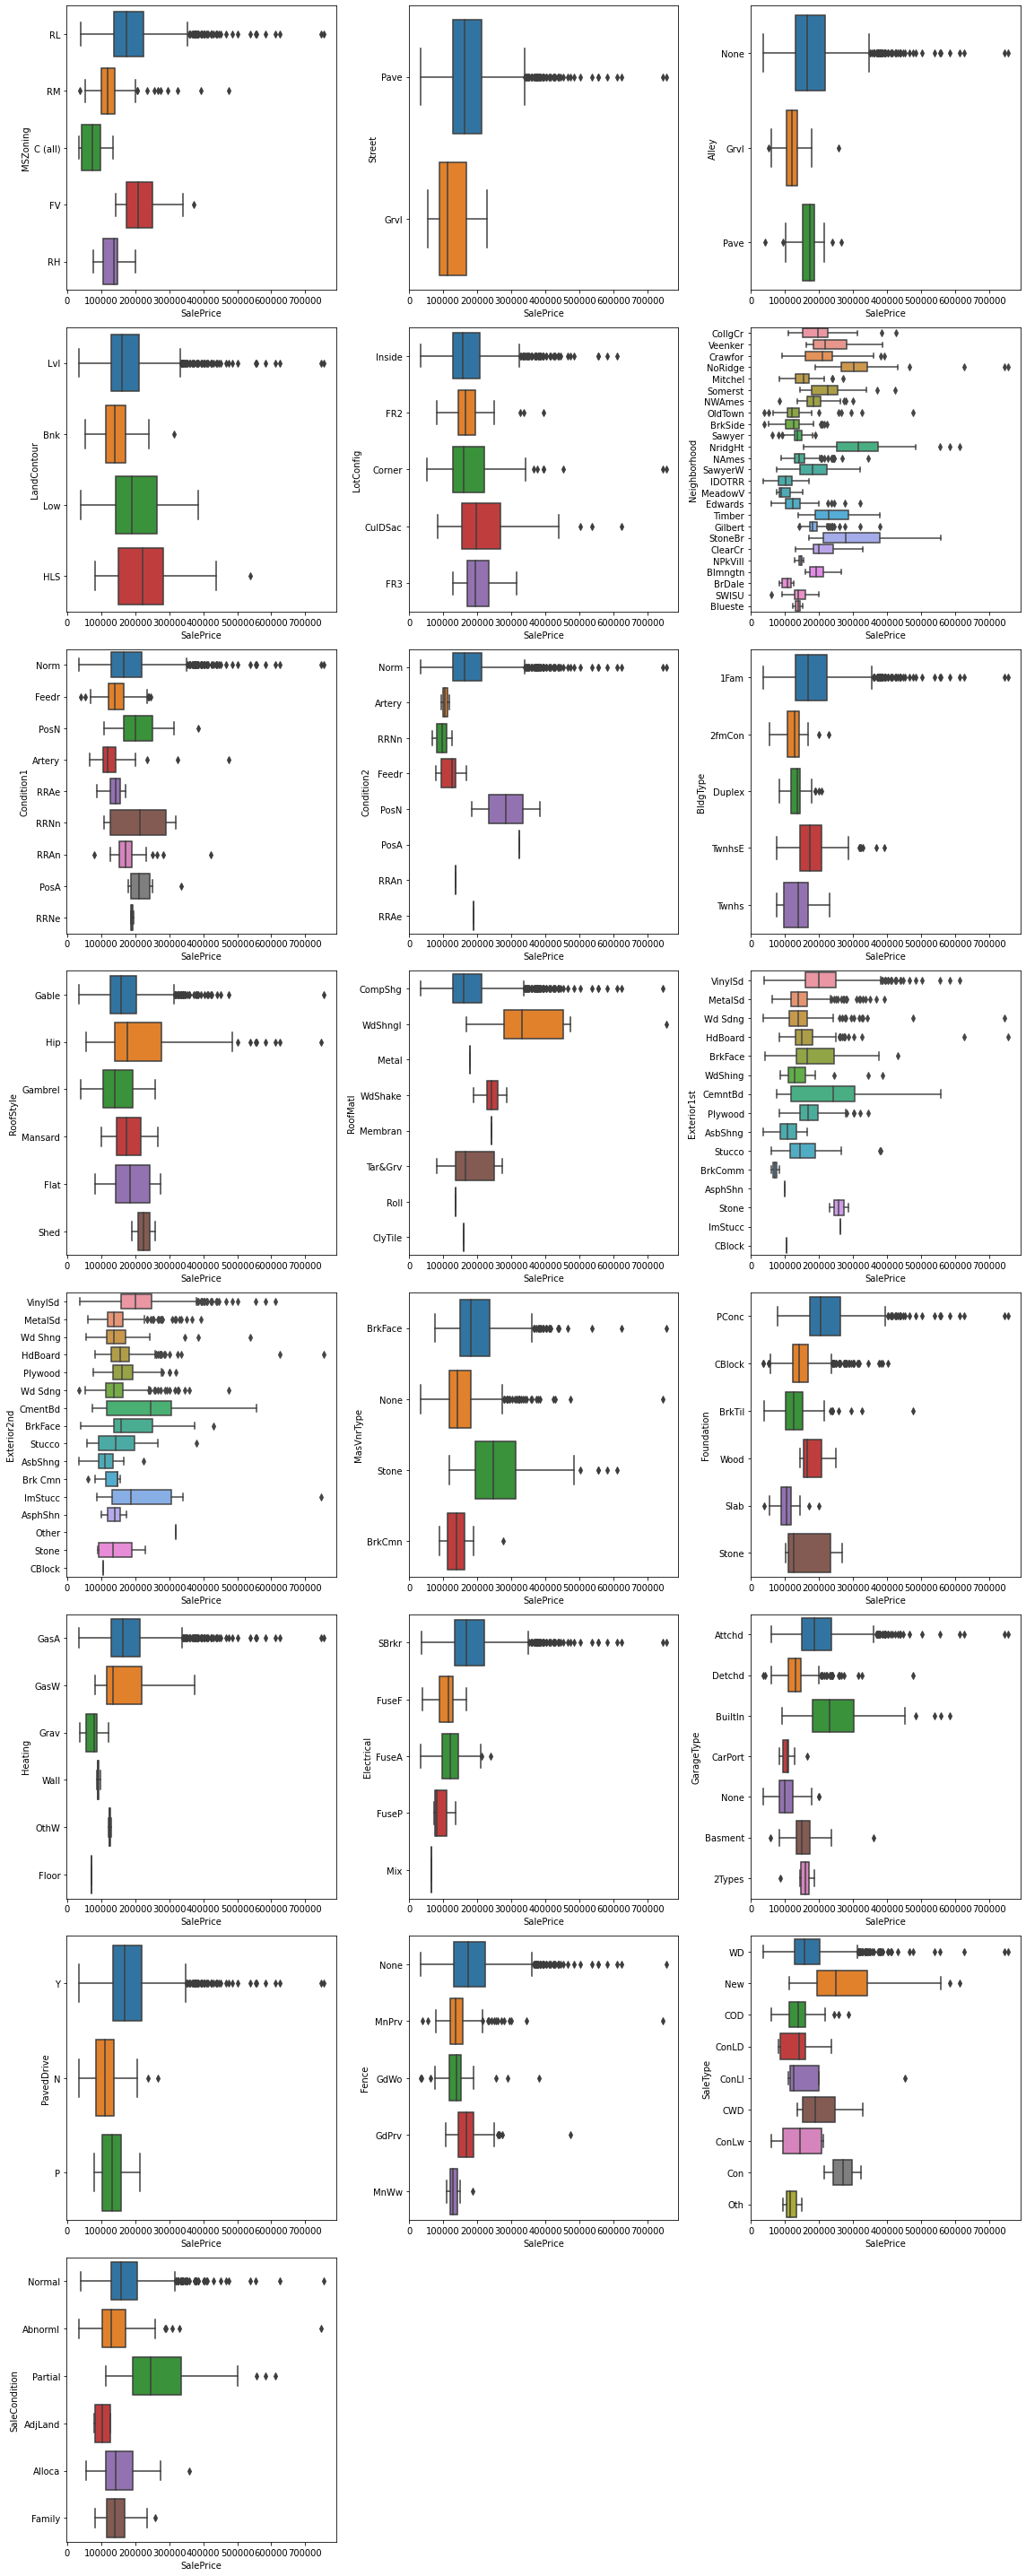

In [38]:
fig=plt.subplots(figsize=(16, 40))
for i, feature in enumerate(unordered_features):
    plt.subplot(8, 3, i+1)
    sns.boxplot(housing_info_df['SalePrice'], housing_info_df[feature])
    plt.tight_layout()

**Observations:**

- We can observe that the most of the houses do not have alley
- We can see neighborhood has a lot of labels
- We can observe that the few reasnos for highest SalePrice here  as well :
    - Houses classified as MSZoning = RL or Residential Low density
    - Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses 
    - Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA
    - Houses with attached and built-in garage
    - Most of the houses are newly built, 
    - Houses with warranty deed
    - Sale condition equals to Normal
    
- We can see features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data(this labels cannot contribute in predicting SalePricee)
- We can see most of the houses do not have fence


## Step 3: Data Preparation

#### Encoding Categorical Features

In [39]:
#Encoding ordered categorical features per the data dictionary 
housing_info_df['LotShape'] = housing_info_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_info_df['Utilities'] = housing_info_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_info_df['LandSlope'] = housing_info_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_info_df['HouseStyle'] = housing_info_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_info_df['ExterQual'] = housing_info_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_info_df['ExterCond'] = housing_info_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_info_df['BsmtQual'] = housing_info_df['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_info_df['BsmtCond'] = housing_info_df['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_info_df['BsmtExposure'] = housing_info_df['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_info_df['BsmtFinType1'] = housing_info_df['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_info_df['BsmtFinType2'] = housing_info_df['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_info_df['HeatingQC'] = housing_info_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_info_df['CentralAir'] = housing_info_df['CentralAir'].map({'N':0,'Y':1})
housing_info_df['KitchenQual'] = housing_info_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_info_df['GarageFinish'] = housing_info_df['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing_info_df['GarageQual'] = housing_info_df['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_info_df['GarageCond'] = housing_info_df['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_info_df['Functional'] = housing_info_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_info_df['FireplaceQu'] = housing_info_df['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


### Create Dummy Columns

In [40]:
unordered_features_dummy_df = pd.get_dummies(housing_info_df[unordered_features], drop_first=True)


In [41]:
list_dummy_feature_to_drop = []
for feature in unordered_features_dummy_df.columns:
    if unordered_features_dummy_df[feature].value_counts()[0]/unordered_features_dummy_df.shape[0] >= 0.95:
        list_dummy_feature_to_drop.append(feature)
        
print(list_dummy_feature_to_drop)

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [42]:
# Dropping the features which are highly imbalanced
unordered_features_dummy_df = unordered_features_dummy_df.drop(list_dummy_feature_to_drop, axis=1)

print(unordered_features_dummy_df.shape)


(1451, 51)


In [43]:
# Adding the dummy variables to the original dataframe
housing_info_df = pd.concat([housing_info_df,unordered_features_dummy_df],axis=1)

# Dropping the redundant columns
housing_info_df = housing_info_df.drop(unordered_features,axis=1)

In [44]:
#check the shape of dataset after dummy variables
housing_info_df.shape

(1451, 97)

In [45]:
# checkng the data again after dummy varaibles
housing_info_df.head(10)

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,3,3,0,3,7,5.00,19,19,196.00,3,2,4,3,1,6,706.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
1,20,80.00,9600,3,3,0,0,6,7.50,46,46,0.00,2,2,4,3,4,5,978.00,1,...,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,0
2,60,68.00,11250,0,3,0,3,7,5.00,21,20,162.00,3,2,4,3,2,6,486.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
3,70,60.00,9550,0,3,0,3,7,5.00,107,52,0.00,2,2,3,4,1,5,216.00,1,...,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0
4,60,84.00,14260,0,3,0,3,8,5.00,22,22,350.00,3,2,4,3,3,6,655.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
5,50,85.00,14115,0,3,0,2,5,5.00,29,27,0.00,2,2,4,3,1,6,732.00,1,...,1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0
6,20,75.00,10084,3,3,0,0,8,5.00,18,17,186.00,3,2,5,3,3,6,"1,369.00",1,...,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
7,60,69.00,10382,0,3,0,3,7,6.00,49,49,240.00,2,2,4,3,2,5,859.00,4,...,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,1,0,1,1,0
8,50,51.00,6120,3,3,0,2,7,5.00,91,72,0.00,2,2,3,3,1,1,0.00,1,...,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0
9,145,50.00,7420,3,3,0,1,5,6.00,83,72,0.00,2,2,3,3,1,6,851.00,1,...,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,1,1,0


In [46]:
housing_info_df.tail(10)

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
1450,90,60.00,9000,3,3,0,3,5,5.00,48,48,0.00,2,2,4,3,1,1,0.00,1,...,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,1,0
1451,20,78.00,9262,3,3,0,0,8,5.00,14,13,194.00,3,2,4,3,1,1,0.00,1,...,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,1
1452,145,35.00,3675,3,3,0,7,5,5.00,17,17,80.00,2,2,4,3,4,6,547.00,1,...,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1,1,0
1453,20,90.00,17217,3,3,0,0,5,5.00,16,16,0.00,2,2,4,3,1,1,0.00,1,...,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,0
1454,20,62.00,7500,3,3,0,0,7,5.00,18,17,0.00,3,2,4,3,1,6,410.00,1,...,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
1455,60,62.00,7917,3,3,0,3,6,5.00,23,22,0.00,2,2,4,3,1,1,0.00,1,...,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
1456,20,85.00,13175,3,3,0,0,6,6.00,44,34,119.00,2,2,4,3,1,5,790.00,3,...,0,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,0
1457,70,66.00,9042,3,3,0,3,7,7.50,81,16,0.00,4,3,3,4,1,6,275.00,1,...,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0
1458,20,68.00,9717,3,3,0,0,5,6.00,72,26,0.00,2,2,3,3,2,6,49.00,3,...,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
1459,20,75.00,9937,3,3,0,0,5,6.00,57,57,0.00,3,2,3,3,1,4,830.00,2,...,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,0


### Check for non-linearity

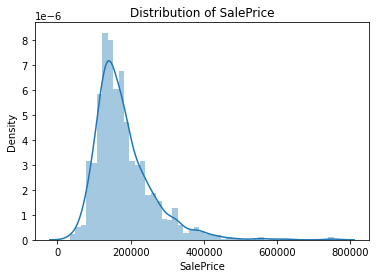

In [47]:
# Let's check the distribution of target variable i.e SalePrice 
plt.title('Distribution of SalePrice')
sns.distplot(housing_info_df['SalePrice'])
plt.show()

- As we can observe SalePrice is highly skewed towards the right side. There is non-linearity in the dateset. Let's now create and observe the distribution of transformed SalePrice.

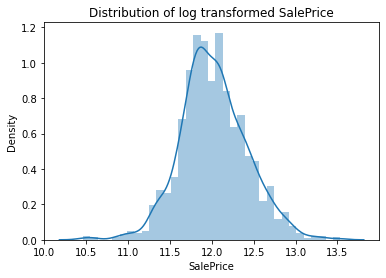

In [48]:
#Let's plo and check the distribution of transformed SalePrice
sns.distplot(np.log(housing_info_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

 - As we can observe clearly that the log transformed SalePrice is normally distributed, therefore we can use transformed data for model building

## Step 4: Splitting the Data into Training and Testing Sets

- Splitting the data to Train and Test: - Let's now split the data into TRAIN and TEST
- I will use train_test_split method from sklearn package for this


In [49]:
housing_info_X = housing_info_df.drop(['SalePrice'], axis=1)
housing_info_X.head()


,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,3,3,0,3,7,5.00,19,19,196.00,3,2,4,3,1,6,706.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
1,20,80.00,9600,3,3,0,0,6,7.50,46,46,0.00,2,2,4,3,4,5,978.00,1,...,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,0
2,60,68.00,11250,0,3,0,3,7,5.00,21,20,162.00,3,2,4,3,2,6,486.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0
3,70,60.00,9550,0,3,0,3,7,5.00,107,52,0.00,2,2,3,4,1,5,216.00,1,...,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0
4,60,84.00,14260,0,3,0,3,8,5.00,22,22,350.00,3,2,4,3,3,6,655.00,1,...,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0


In [50]:
#As we observed log transformed SalePrice is normally distributed
# Therefore we can use transformed datafor model building

housing_info_y = np.log(housing_info_df['SalePrice'])
housing_info_y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(housing_info_X, housing_info_y, train_size = 0.80, test_size = 0.20, random_state = 333)


In [52]:
# let's check shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1160, 96)
(1160,)
(291, 96)
(291,)


### Rescaling the features

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train_numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
scaler.fit(X_train_numeric_df)

StandardScaler()

In [55]:
X_test_numeric_df = X_test.select_dtypes(include=['int64', 'float64'])
scaler.fit(X_test_numeric_df)

StandardScaler()

In [56]:
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train_numeric_df), columns=X_train_numeric_df.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test_numeric_df), columns=X_test_numeric_df.columns)

## Step 5: Recursive Feature Elimination(RFE)


In [57]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [58]:
# functin for features selectin using RFE

def features_selectin_using_RFE(X,y):
    # getting a linear regression model and fit the sets
    lm = LinearRegression()
    lm.fit(X, y)
    
    #Running RFE on linear regression model
    rfe = RFE(lm, n_features_to_select=50)
    rfe = rfe.fit(X, y)
    
    #print list of variables selected by RFE approach
    #print(list(zip(X.columns,rfe.support_,rfe.ranking_)))
    
    #Select variables where RFE support is True
    X_rfe_col = X.columns[rfe.support_]
    
    # Creating X_train dataframe with RFE selected variables
    X_rfe = X[X_rfe_col]

    return X_rfe

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = features_selectin_using_RFE(X_train_scaled, y_train)
X_train_rfe.shape

(1160, 44)

In [60]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = features_selectin_using_RFE(X_test_scaled, y_test)
X_train_rfe.shape

(1160, 44)

#### Build Model using StatsModel APIs

In [61]:
# import statsmodels
import statsmodels.api as sm  

# function to build model
def build_SModel(X,y):
    #add a constant to make set a 2 dimension
    X = sm.add_constant(X)
    # Statsmodel linear model object on RFE selected variables
    lrm = sm.OLS(y.values.reshape(-1,1), X).fit()
    #return 
    return lrm

In [62]:
# Create a fitted model
lrm= build_SModel(X_train_rfe, y_train)
print(lrm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     299.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:53:07   Log-Likelihood:                 844.54
No. Observations:                1160   AIC:                            -1605.
Df Residuals:                    1118   BIC:                            -1393.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass      -0.0059      0.005     -1.241   

- As we can observe r2-score is petty high we have chosen right number of features

## Step 6: Ridge Regression Model


In [63]:
# Functin to build ridge regression model using GridSearchCV cross validation
def build_ridge_model(X_train, y_train, X_test, param_grid):
    ridge_model = Ridge()
    # cross validation
    ridge_grid_search_cv = GridSearchCV(estimator = ridge_model, 
                          param_grid = param_grid, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    ridge_grid_search_cv.fit(X_train, y_train)
    ridge_best_alpha = ridge_grid_search_cv.best_params_["alpha"]
    print("Best alpha for %s is %f" %('ridge', ridge_best_alpha))
    
    # get the best estimator for lambda
    rm = ridge_grid_search_cv.best_estimator_

    rm.fit(X_train, y_train)
    y_train_pred = rm.predict(X_train)
    y_test_pred  = rm.predict(X_test)
    print(rm)
    print(rm.coef_)
    
    return rm, ridge_grid_search_cv, X_train, y_train, y_train_pred, y_test_pred


In [64]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, ridge_grid_search_cv, X_rf_train, y_rf_train, y_train_r_pred, y_test_r_pred = build_ridge_model(X_train_rfe, y_train, X_test_rfe, param_grid)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best alpha for ridge is 7.000000
Ridge(alpha=7.0)
[-5.73033537e-03  1.11038064e-02  2.88530283e-02 -5.58433822e-03
 -1.20440613e-30  3.75254788e-03 -5.57491529e-03  9.23929572e-02
  4.52440936e-02 -5.41396489e-02 -1.46027680e-02 -1.01871314e-03
  1.84389172e-02 -4.07542172e-03  1.41129564e-02 -6.18722718e-03
  1.23554417e-02  9.33709391e-03  4.92814044e-02  8.70973671e-03
  0.00000000e+00  2.05713430e-02  1.68677390e-02  1.77511035e-02
  9.47022797e-02  7.13039544e-02  3.84856663e-02  1.23640103e-02
  0.00000000e+00  1.81112097e-02  9.61485290e-03 -1.93263316e-03
  7.40833033e-03 -2.06856724e-02  9.68167981e-03  1.50305333e-02
  7.33041200e-04  2.46795759e-02  1.02679614e-02  3.57973137e-03
  3.50095472e-03  8.25171150e-03 -5.90310554e-04  4.26266158e-03]


In [65]:
# display the mean scores
ridge_cvr = pd.DataFrame(ridge_grid_search_cv.cv_results_)
ridge_cvr = ridge_cvr[ridge_cvr['param_alpha']<=1000]
ridge_cvr[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
#print(ridge_cvr)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
18,7.00,-0.08,-0.09,1
17,6.00,-0.08,-0.09,2
19,8.00,-0.08,-0.09,3
16,5.00,-0.08,-0.09,4
20,9.00,-0.08,-0.09,5
15,4.00,-0.08,-0.09,6
21,10.00,-0.08,-0.09,7
14,3.00,-0.08,-0.09,8
13,2.00,-0.08,-0.09,9
22,20,-0.08,-0.09,10


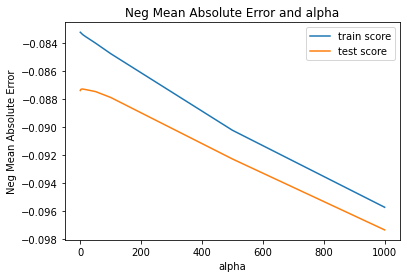

In [66]:
# plotting mean test and train scoes with alpha 
ridge_cvr['param_alpha'] = ridge_cvr['param_alpha'].astype('float64')
# plotting
plt.plot(ridge_cvr['param_alpha'], ridge_cvr['mean_train_score'])
plt.plot(ridge_cvr['param_alpha'], ridge_cvr['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')
plt.title("Neg Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()
    

In [67]:
# Create a dataframe based on ridge coefficients
final_ridge_df = pd.DataFrame({'Feat':X_rf_train.columns, 'Coeff':ridge_final_model.coef_.round(4)})
final_ridge_df.reset_index(drop=True, inplace=True)
print(final_ridge_df)

            Feat  Coeff
0     MSSubClass  -0.01
1    LotFrontage   0.01
2        LotArea   0.03
3       LotShape  -0.01
4      Utilities  -0.00
5      LandSlope   0.00
6     HouseStyle  -0.01
7    OverallQual   0.09
8    OverallCond   0.05
9      YearBuilt  -0.05
10  YearRemodAdd  -0.01
11    MasVnrArea  -0.00
12     ExterQual   0.02
13     ExterCond  -0.00
14      BsmtQual   0.01
15      BsmtCond  -0.01
16  BsmtExposure   0.01
17  BsmtFinType1   0.01
18    BsmtFinSF1   0.05
19  BsmtFinType2   0.01
20    BsmtFinSF2   0.00
21     BsmtUnfSF   0.02
22     HeatingQC   0.02
23    CentralAir   0.02
24      1stFlrSF   0.09
25      2ndFlrSF   0.07
26     GrLivArea   0.04
27  BsmtFullBath   0.01
28  BsmtHalfBath   0.00
29      FullBath   0.02
30      HalfBath   0.01
31  BedroomAbvGr  -0.00
32   KitchenQual   0.01
33    Functional  -0.02
34    Fireplaces   0.01
35   FireplaceQu   0.01
36  GarageFinish   0.00
37    GarageArea   0.02
38    GarageQual   0.01
39    GarageCond   0.00
40    WoodDeckSF

### Validating Assumptions and Model Evaluation

#### Error terms are normally distributed with mean zero (not X, Y)

#### Residual Analysis of the train data

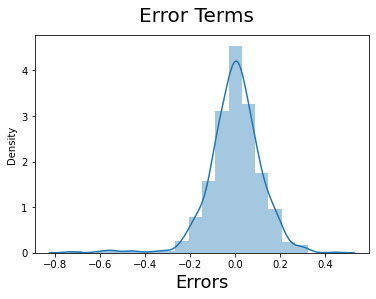

In [68]:
res = y_train-y_train_r_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

**Observation:**
- we can observe that the Residuals are normally distributed.
- Hence our assumption for Ridge Regression is valid.

#### Homoscedasticity Assumption

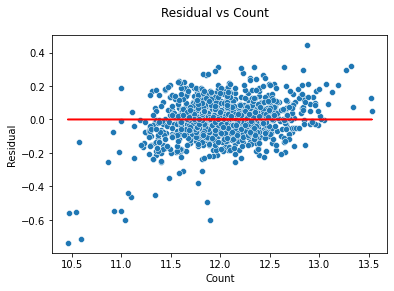

In [69]:
residual = y_train - y_train_r_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

**Observation:**
   - residuals are equal across the regression line

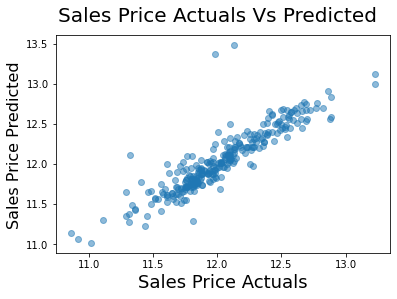

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_r_pred, alpha=.5)
fig.suptitle('Sales Price Actuals Vs Predicted', fontsize = 20)              
plt.xlabel('Sales Price Actuals', fontsize = 18)                          
plt.ylabel('Sales Price Predicted', fontsize = 16)      
plt.show()

#### R^2 Score and RMSE for Train  set

In [71]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R2-score: ',round(r2_score(y_train,y_train_r_pred),4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_train,y_train_r_pred)),4))

R2-score:  0.9165
RMSE:  0.1169


#### R^2 Score and RMSE for Test set

In [72]:
print('R2-score: ',round(r2_score(y_test,y_test_r_pred),4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_test,y_test_r_pred)),4))


R2-score:  0.787
RMSE:  0.1743


## Step 7: Lasso Regression Model

In [73]:
# Functin to build lasso regression model using GridSearchCV cross validation
def build_lasso_model(X_train, y_train, X_test, param_grid):
    lasso_model = Lasso()
    # cross validation
    lasso_grid_search_cv = GridSearchCV(estimator = lasso_model, 
                          param_grid = param_grid, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)   
    
    lasso_grid_search_cv.fit(X_train, y_train)
    lasso_best_alpha = lasso_grid_search_cv.best_params_["alpha"]
    print("best alpha for %s is %f" %('lasso', lasso_best_alpha))
    
    # get the best estimator for lambda
    lasso_model = lasso_grid_search_cv.best_estimator_

    lasso_model.fit(X_train, y_train)
    y_train_pred = lasso_model.predict(X_train)
    y_test_pred  = lasso_model.predict(X_test)
    print(lasso_model)
    print(lasso_model.coef_)
    
    
    return lasso_model, lasso_grid_search_cv, X_train, y_train, y_train_pred, y_test_pred


In [74]:
param_grid = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04]}
lasso_final_model, lasso_grid_search_cv, X_ls_train, y_ls_train, y_train_l_pred, y_test_l_pred = build_lasso_model(X_train_rfe, y_train, X_test_rfe, param_grid)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
best alpha for lasso is 0.001000
Lasso(alpha=0.001)
[-0.0048957   0.01037962  0.02943249 -0.00510876 -0.          0.0025961
 -0.00488077  0.09505636  0.04338826 -0.055483   -0.01473597 -0.
  0.01812671 -0.00238096  0.01305808 -0.0005159   0.01162073  0.00751133
  0.0426483   0.00551271  0.          0.01095304  0.01700013  0.01685088
  0.09861959  0.06835342  0.03950573  0.01112772  0.          0.01615341
  0.0080772  -0.          0.00744004 -0.01942393  0.00967203  0.01439308
  0.00094524  0.02537859  0.00990828  0.00258176  0.00290926  0.00818572
 -0.          0.00277083]


In [75]:
#display the mean scores
lasso_cvr = pd.DataFrame(lasso_grid_search_cv.cv_results_)
lasso_cvr[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
    

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.00,-0.08,-0.09,1
4,0.00,-0.08,-0.09,2
6,0.00,-0.08,-0.09,3
3,0.00,-0.08,-0.09,4
2,0.00,-0.08,-0.09,5
1,0.00,-0.08,-0.09,6
0,0.00,-0.08,-0.09,7
7,0.00,-0.08,-0.09,8
8,0.00,-0.08,-0.09,9
9,0.01,-0.08,-0.09,10


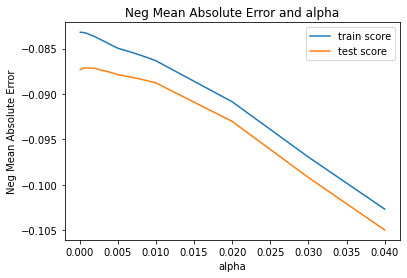

In [76]:
# plotting mean test and train scoes with alpha 
lasso_cvr['param_alpha'] = lasso_cvr['param_alpha'].astype('float64')

# plotting
plt.plot(lasso_cvr['param_alpha'], lasso_cvr['mean_train_score'])
plt.plot(lasso_cvr['param_alpha'], lasso_cvr['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')

plt.title("Neg Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()    

In [77]:
# Create a dataframe based on lasso coefficients 
final_lasso_df = pd.DataFrame({'Feat':X_ls_train.columns, 'Coeff':lasso_final_model.coef_.round(4)})
final_lasso_df.reset_index(drop=True, inplace=True)
print(final_lasso_df) 

            Feat  Coeff
0     MSSubClass  -0.00
1    LotFrontage   0.01
2        LotArea   0.03
3       LotShape  -0.01
4      Utilities  -0.00
5      LandSlope   0.00
6     HouseStyle  -0.00
7    OverallQual   0.10
8    OverallCond   0.04
9      YearBuilt  -0.06
10  YearRemodAdd  -0.01
11    MasVnrArea  -0.00
12     ExterQual   0.02
13     ExterCond  -0.00
14      BsmtQual   0.01
15      BsmtCond  -0.00
16  BsmtExposure   0.01
17  BsmtFinType1   0.01
18    BsmtFinSF1   0.04
19  BsmtFinType2   0.01
20    BsmtFinSF2   0.00
21     BsmtUnfSF   0.01
22     HeatingQC   0.02
23    CentralAir   0.02
24      1stFlrSF   0.10
25      2ndFlrSF   0.07
26     GrLivArea   0.04
27  BsmtFullBath   0.01
28  BsmtHalfBath   0.00
29      FullBath   0.02
30      HalfBath   0.01
31  BedroomAbvGr  -0.00
32   KitchenQual   0.01
33    Functional  -0.02
34    Fireplaces   0.01
35   FireplaceQu   0.01
36  GarageFinish   0.00
37    GarageArea   0.03
38    GarageQual   0.01
39    GarageCond   0.00
40    WoodDeckSF

### Validating Assumptions and Model Evaluation

#### Error terms are normally distributed with mean zero (not X, Y)

#### Residual Analysis of the train data

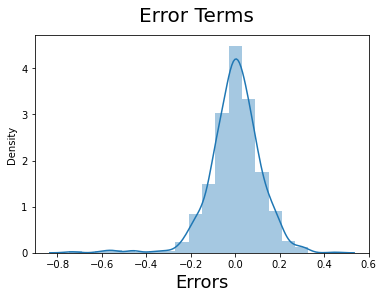

In [78]:
res = y_train-y_train_l_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

**Observation:**
   - residuals are equal across the regression line

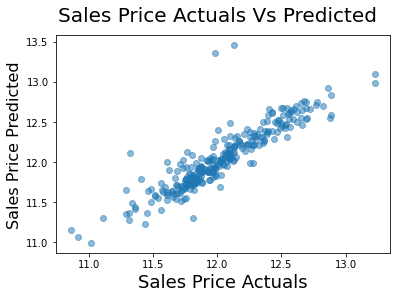

In [79]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_l_pred, alpha=.5)
fig.suptitle('Sales Price Actuals Vs Predicted', fontsize = 20)              
plt.xlabel('Sales Price Actuals', fontsize = 18)                          
plt.ylabel('Sales Price Predicted', fontsize = 16)      
plt.show()

#### R^2 Score and RMSE for Train  set

In [80]:
from sklearn.metrics import r2_score
print('R2-score: ',round(r2_score(y_train,y_train_l_pred),4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_train,y_train_l_pred)),4))


R2-score:  0.9163
RMSE:  0.1171


#### R^2 Score and RMSE for Test set

In [81]:
print('R2-score: ',round(r2_score(y_test,y_test_l_pred),4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_test,y_test_l_pred)),4))


R2-score:  0.7877
RMSE:  0.174


## Step 8: Comparing Model Coefficients

In [82]:
model_coef = pd.DataFrame(index=X_test_rfe.columns)
model_coef.rows = X_test_rfe.columns

model_coef['R_coef_alpha_0.7'] = ridge_final_model.coef_
model_coef['L_coef_alpha_0.0001'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coef

,R_coef_alpha_0.7,L_coef_alpha_0.0001
MSSubClass,-0.01,-0.00
LotFrontage,0.01,0.01
LotArea,0.03,0.03
LotShape,-0.01,-0.01
Utilities,-0.00,-0.00
LandSlope,0.00,0.00
HouseStyle,-0.01,-0.00
OverallQual,0.09,0.10
OverallCond,0.05,0.04
YearBuilt,-0.05,-0.06


In [83]:
# Converting the predictions to its original scale (anti log)
test_prediction = np.round(np.exp(y_test_l_pred)).astype(int)
print(test_prediction[:5])

[118468 175617 128744 134586 223159]


## Step 9: Final Model
Lasso Regression is showing slightly higher R2-score on test data than Ridge Regression. Therefore, choosing Lasso as the final model.

In [84]:
# Lasso Regression features ordered by feature importance 
model_coef[['L_coef_alpha_0.0001']].sort_values(by='L_coef_alpha_0.0001', ascending=False)


,L_coef_alpha_0.0001
1stFlrSF,0.10
OverallQual,0.10
2ndFlrSF,0.07
OverallCond,0.04
BsmtFinSF1,0.04
GrLivArea,0.04
LotArea,0.03
GarageArea,0.03
ExterQual,0.02
HeatingQC,0.02


In [85]:
model_coef[['L_coef_alpha_0.0001']].sort_values(by='L_coef_alpha_0.0001', ascending=False).index[:10]

Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'BsmtFinSF1',
       'GrLivArea', 'LotArea', 'GarageArea', 'ExterQual', 'HeatingQC'],
      dtype='object')

## Step 10: Subjective Question's Solutions 


#### Questions 1 :


- What is the optimal value of alpha for ridge and lasso regression? 
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
- What will be the most important predictor variables after the change is implemented?

- optimal value of alpha for ridge regression - 7.0
- optimal value of alpha for lasso regression - 0.0001
- Let's Check for double :

In [86]:
# Ridge Model Building
ridge_model = Ridge(alpha=14.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting with alpha=14.0
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation for Ridge Regression with alpha=14.0")
print("On Train dataset:")
print('R2-score: ',round(r2_score(y_train,y_train_pred), 4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print("On Test dataset:")
print('R2-score: ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))


Model Evaluation for Ridge Regression with alpha=14.0
On Train dataset:
R2-score:  0.9164
RMSE:  0.117
On Test dataset:
R2-score:  0.7891
RMSE:  0.1734


- On Train dataset:
    - R2-score:  0.9165
    - RMSE:  0.1169

- On Test dataset:    
    - R2-score:  0.787
    - RMSE:  0.1743
    
- There s no much difference but we can observe slightly lower R2-score on test data    

In [87]:
# Lasso Model Building
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)

# Predicting with alpha=0.0002
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation for Lasso Regression with alpha=0.0002")
print("On Train dataset:")
print('R2-score: ',round(r2_score(y_train,y_train_pred), 4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print("On Test dataset:")
print('R2-score: ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation for Lasso Regression with alpha=0.0002
On Train dataset:
R2-score:  0.9166
RMSE:  0.1168
On Test dataset:
R2-score:  0.7842
RMSE:  0.1754


- On Train dataset:
    - R2-score:  0.9163
    - RMSE:  0.1171
- On Test dataset:    
    - R2-score:  0.787
    - RMSE:  0.1743
- There s no much difference but we can observe slightly lower R2-score on test data    

In [88]:
model_coef['R_coef_alpha_14.0'] = ridge_model.coef_
model_coef['L_coef_alpha_0.0002'] = lasso_model.coef_
#pd.set_option('display.max_rows', None)
#model_coef

In [89]:
model_coef.sort_values(by='R_coef_alpha_14.0', ascending=False).head(5)

,R_coef_alpha_0.7,L_coef_alpha_0.0001,R_coef_alpha_14.0,L_coef_alpha_0.0002
OverallQual,0.09,0.10,0.09,0.09
1stFlrSF,0.09,0.10,0.09,0.11
2ndFlrSF,0.07,0.07,0.06,0.09
BsmtFinSF1,0.05,0.04,0.05,0.05
GrLivArea,0.04,0.04,0.05,0.02


In [90]:
model_coef.sort_values(by='L_coef_alpha_0.0002', ascending=False).head(5)


,R_coef_alpha_0.7,L_coef_alpha_0.0001,R_coef_alpha_14.0,L_coef_alpha_0.0002
1stFlrSF,0.09,0.10,0.09,0.11
OverallQual,0.09,0.10,0.09,0.09
2ndFlrSF,0.07,0.07,0.06,0.09
BsmtFinSF1,0.05,0.04,0.05,0.05
OverallCond,0.05,0.04,0.04,0.05


- Most important predictor variables after the change:
    - for Ridge (alpha = 14.0): OverallQual
    - for Lasso (alpha = 0.0002): 1stFlrSF

#### Questions 3

- After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
- You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

In [91]:
#5 most important predictor variables in the lasso model 
model_coef.sort_values(by='L_coef_alpha_0.0001', ascending=False).head(5)

,R_coef_alpha_0.7,L_coef_alpha_0.0001,R_coef_alpha_14.0,L_coef_alpha_0.0002
1stFlrSF,0.09,0.10,0.09,0.11
OverallQual,0.09,0.10,0.09,0.09
2ndFlrSF,0.07,0.07,0.06,0.09
OverallCond,0.05,0.04,0.04,0.05
BsmtFinSF1,0.05,0.04,0.05,0.05


In [92]:
X_train_new = X_train_rfe.drop(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'BsmtFinSF1'], axis=1)


In [93]:
X_test_new = X_test_rfe.drop(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'BsmtFinSF1'], axis=1)


In [94]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)


In [95]:
lasso_model.coef_

array([-0.01277391,  0.01268219,  0.02951042, -0.00575028, -0.        ,
       -0.00219125, -0.01814967, -0.0316308 , -0.02884983,  0.01099378,
        0.03566111,  0.00665846,  0.03068428, -0.00098949,  0.02860815,
        0.02758199,  0.00088827,  0.        ,  0.00259869,  0.01342386,
        0.03195497,  0.16224881,  0.01853428,  0.        ,  0.02014484,
       -0.00249398, -0.00694357,  0.02754955, -0.03033188,  0.02371384,
        0.01720494,  0.00144343,  0.03249457,  0.01238736,  0.00581282,
        0.00500462,  0.00845033, -0.00115633,  0.00314403])

In [96]:
# 5 most important predictor variables now
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso Coef'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso Coef', ascending=False).head(5)

,Lasso Coef
GrLivArea,0.16
ExterQual,0.04
GarageArea,0.03
CentralAir,0.03
BsmtQual,0.03
